Markdown cell


In [20]:
#import statements

import numpy as np
import matplotlib as plt


In [21]:
def entropy(pmf: np.array) -> float:
    """This function returns the entropy of the given pmf 

    The formula used is : -sum p(x) log p(x)

    Example
    --------
    >>> p = np.array([0.5, 0.5])
    >>> entropy(p)
    1.0
    """
    return -np.sum(pmf*np.log2(pmf))

def KL_divergence(p: np.array, q: np.array) -> float:
    """This function returns the KL divergence between the two given pmfs
    
    The formula used is : sum p(x) log p(x)/q(x) 
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> KL_divergence(p, q)
    0.029446844526784283
    """
    idx = np.argwhere( q == 0.0 )
    q[idx]+=1e-5
    idx = np.argwhere( p == 0.0 )
    p[idx]+=1e-5
    return np.sum(p * np.log2(p/q)) 

def cross_entropy(p: np.array, q:np.array) -> float:
    """This function returns the cross entropy betwen the two given pmfs
    
    The formula used is : H(p) + D(p||q)
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> cross_entropy(p, q)
    1.0294468445267844
    """
    return entropy(p)+KL_divergence(p, q)

def JS_divergence(p: np.array, q:np.array) -> float:
    """This function return the Jenson Shannon divergence between
    the given two pmfs
    
    The formula used is : D(p||m)+D(q||m), where
    m = (p+q)/2
    
    Example
    -------
    >>> p = np.array([0.5, 0.5])
    >>> q = np.array([0.6, 0.4])
    >>> JS_divergence(p, q)
    0.014598313520947925
    """
    m = (p+q)/2
    return KL_divergence(p, m) + KL_divergence(q, m)

def checkValidTuple(pmf : np.array, rx: np.array, sy: np.array, tolerance: float = 1e-6) -> bool:
    """This function returns wether or not the given tuple of pmf, marginals
    is valid

    Optional Argument
    -----------------
    Tolerance: There can be error calculating probabilities, it might be worth adding a tolerance which
    if sort of a measure of how much error can be accomodated.
    
    Condition used
    --------------
    sum_over(i) p_ij = s
    
    sum_over(j) p_ij = r
    
    Example
    -------
    >>> rx = np.array([0.5, 0.25, 0.125, 0.125])
    >>> sy = np.array([0.25, 0.25, 0.25, 0.25])
    >>> ValidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0], [1/32, 1/32, 1/16, 0], [1/32, 1/32, 1/16, 0]])
    >>> checkValidTuple(ValidPmf, rx, sy)
    True
    >>> InvalidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0], [1/32, 1/32, 1/16, 0], [1/32, 1/32, 0, 1/16]])
    >>> checkValidTuple(InvalidPmf, rx, sy)
    False
    """
    rx_calc = np.sum(pmf, axis=1)
    sy_calc = np.sum(pmf, axis=0)
    
    if np.linalg.norm(rx_calc-rx)<tolerance:
        if np.linalg.norm(sy_calc-sy)<tolerance:
            return True
    return False

p = np.array([0.5, 0.5])
q = np.array([0.6, 0.4])
rx = np.array([0.5, 0.25, 0.125, 0.125])
sy = np.array([0.25, 0.25, 0.25, 0.25])
ValidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0],\
     [1/32, 1/32, 1/16, 0], [1/32, 1/32, 1/16, 0]])
InvalidPmf = np.array([[0.125, 0.0625, 0.0625, 0.25], [1/16, 1/8, 1/16, 0],\
     [1/32, 1/32, 1/16, 0], [1/32, 1/32, 0, 1/16]])
# print(entropy(p))
# print(KL_divergence(p, q))
# print(cross_entropy(p, q))
# print(checkValidTuple(ValidPmf, rx, sy))
# print(checkValidTuple(InvalidPmf, rx, sy))


# Question-2
## Part-a
### i) What is the crowding problem?
Crowding problem refers to the problem when we are not able to reproduce the distances from hidher dimensional space to lower dimensional space. Consider the case of a regular tetrahedron in three dimensions, it is not possible to have four points in two dimensions which are equidistant from one another. In case of SNE, the cost of representing data points which are close in higher dimensions as far apart in lower dimension is high.

### ii) How does the choice of the Student t-distribution in the low dimensional embedding space help address the crowding problem?
Student t-distribution is heavy tailed

### Part-b

In [82]:
dimensions = 10
mu1 = np.ones(dimensions)
mu2 = 10*mu1
cov = 0.01*np.eye(dimensions)
# mu = [1]*10, cov = 0.01 I
cluster1 = np.random.multivariate_normal(mu1,cov,10)
# mu = [10]*10, cov = 0.01 I
cluster2 = np.random.multivariate_normal(mu2,cov,10)
# stacking the two clusters in the same matrix
X = np.vstack((cluster1,cluster2))



class tsne:
    def __init__(self, X) -> None:
        self.X = X
        self.Y = None
    
    
    def calc_p_util(self) -> np.array:
        (m,n) = self.X.shape
        s = np.ones(m)        

        p = np.zeros( (m, m) )
        for i in range(m):

            denominator = -1
            
            for j in range(m):
                denominator += np.exp( -(np.linalg.norm(self.X[i]-self.X[j])**2)/(2*s[i]**2) )
            
            for j in range(m):
                if j == i:
                    continue
                p[i,j] = np.exp( -(np.linalg.norm(self.X[i]-self.X[j])**2)/(2*s[i]**2) )/denominator

        for i in range(m):
            for j in range(i,m):
                p[i,j] = (p[i,j]+p[j,i])/(2*n)
        for i in range(m):
            for j in range(i):
                p[i,j] = p[j,i]

        return p

    def calc_q_util(self) -> np.array:
        (m, n) = self.Y.shape         
        q = np.zeros((m,m))

        denominator = 0
        for i in range(m):
            for j in range(m):
                if i==j:
                    continue
                denominator += 1/(1 + np.linalg.norm(self.Y[i]-self.Y[j])**2)
        for i in range(m):
            for j in range(m):
                if i==j:
                    continue
                q[i,j] = (1/(1+ np.linalg.norm(self.Y[i]-self.Y[j])**2))/denominator
        return q

    def calc_gradient_util(self, learning_rate: float, p:np.array, q:np.array) -> np.array:
        (m,n) = self.Y.shape
        gradient = np.zeros((m,n))
        for i in range(m):
            for j in range(m):
                gradient[i]+=(p[i,j]-q[i,j])*(self.Y[i]-self.Y[j])/(1+np.linalg.norm(self.Y[i]-self.Y[j])**2)
        return gradient

    def process(self, T:int, momentum_decay_func, learning_rate:float, dimensions:int) -> None:
        (m,n) = self.X.shape
        mean = np.zeros(dimensions)
        cov = (1e-2)*np.eye(dimensions)
        self.Y = np.random.multivariate_normal(mean, cov, m)
        p = self.calc_p_util()
        q = self.calc_q_util()
        print(p)
        print("initial divergence:",KL_divergence(p.flatten(), q.flatten()))
        change = self.Y.copy()
        for t in range(T):
            gradient = self.calc_gradient_util(learning_rate,p ,q)
            new_change =  4*learning_rate*gradient + momentum_decay_func(t)*(change)
            self.Y -= new_change
            change = new_change

            # print(np.linalg.norm(gradient))
        # print(np.linalg.norm(gradient))
        q = self.calc_q_util()
        print("final divergence:",KL_divergence(p.flatten(), q.flatten()))
        


def alpha(t:int) -> float:
    return 1/(1+t)

In [83]:
mytsne = tsne(X)
mytsne.process(50, alpha, 10,2)


[[0.00000000e+000 1.13002623e-002 1.13577383e-002 1.12971427e-002
  1.18359627e-002 1.16444711e-002 1.02513384e-002 1.16962769e-002
  1.08612504e-002 1.10462871e-002 1.08869924e-176 2.28107321e-177
  1.91869507e-177 1.46297429e-179 3.55201932e-179 2.72695941e-175
  2.17347216e-178 2.10673876e-178 8.68207243e-179 6.21548686e-180]
 [1.13002623e-002 0.00000000e+000 1.12856516e-002 1.15135036e-002
  1.10509466e-002 1.14302589e-002 1.15037011e-002 1.08574553e-002
  1.13606109e-002 1.10885531e-002 2.62401822e-178 5.16357856e-179
  4.05574206e-179 2.99642998e-181 7.32733250e-181 6.12456888e-177
  4.48411486e-180 4.76121330e-180 2.00174914e-180 1.36151990e-181]
 [1.13577383e-002 1.12856516e-002 0.00000000e+000 1.13088727e-002
  1.08491833e-002 1.14089523e-002 1.09760839e-002 1.13885013e-002
  1.00806784e-002 1.11107197e-002 5.87442658e-177 1.30977265e-177
  9.54837097e-178 7.52837762e-180 1.92004921e-179 1.29460631e-175
  1.09113567e-178 1.15793137e-178 4.47406864e-179 3.13065082e-180]
 [1.129

In [84]:
mytsne.Y

array([[-5.30273327,  5.22215919],
       [-5.1812915 ,  5.835525  ],
       [-4.33330531,  5.38017217],
       [-4.78353766,  4.98225808],
       [-4.81268331,  5.95079185],
       [-4.69174072,  4.92316943],
       [-5.20512397,  5.22845276],
       [-4.44102911,  5.7121136 ],
       [-4.36589916,  5.55781129],
       [-5.14617946,  5.81008834],
       [ 5.2695391 , -5.464439  ],
       [ 4.83500777, -4.96178287],
       [ 4.43118003, -5.83673003],
       [ 4.32858191, -5.27909948],
       [ 5.0283232 , -5.82050707],
       [ 4.61504196, -5.09825972],
       [ 5.20642769, -5.68027827],
       [ 4.26646292, -5.41088962],
       [ 4.76135717, -5.90528165],
       [ 5.09896784, -4.99498059]])

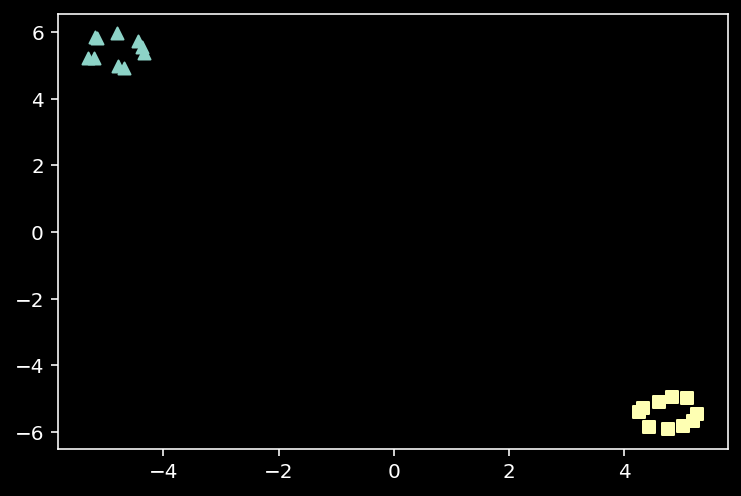

In [85]:
import matplotlib.pyplot as plt
# changing theme
plt.style.use('dark_background')
# clear image
%config InlineBackend.figure_format = 'retina'  

Y = mytsne.Y
plt.scatter( Y[:10,0],Y[:10,1], marker = '^')
plt.scatter( Y[10:,0],Y[10:,1], marker = 's')

plt.show()